# Introduction into regression analysis

In pattern recognition problem we have

$Y \in D_Y = \{w_1, ... , w_k\}$

is a set of unordered values, i.e. $Y$ - a qualitative variable

**Regression analysis**: $Y \in R$ is a real-valued variable.

Random samples of objects $ \{ o^{(1)}, ... , o^{(N)}\}$

Set of variables $X_1, ... , X_n$

Data table $ x^{(i)}_j = X_j(o^{(i)}),\space j = 1, ... , n; y^{(i)}=Y(o^{(i)}) \space i = 1, ... , N $

Purpose of analysis is to predict values of variable $Y$ depending on values $X$ for any new object by minimizing some expected loss $L(y_{pred}, y_{real})$

Usually we use OLS (ordinary least squares) loss function : $L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$

## Approaches for regression:
* Parametric models
* Non-parametric
* SVM
* Logical rules (regression trees)
* ...


Our linear model will look like:
$$ Y^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + ... + \beta_nx^{(i)}_n + \epsilon^{(i)} $$

$ \epsilon $ - is supposed to be $N(0, \sigma)$, $\epsilon^{(i)}$ and $\epsilon^{(i)}$ are supposed to be independent for $i \neq j $

in matrix form:
**$$ Y = X\beta +  \epsilon $$**

# Examples of regression implementations (OLS)

* scikit-learn - easier to use
* statsmodel - provide stats out of the box (easier to perform statistical tests, and build confidence intervals), but interfaces are a bit harder
* tensorflow - we build linear regression with that library just to grasp a concept of computational graphs and SGD optimization


Coefficients: 
 [ 938.23786125] 152.918861826
Mean squared error: 2548.07
Variance score: 0.47


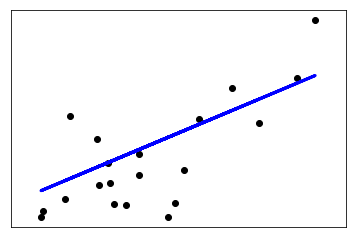

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [2]:
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
X = sm.add_constant(spector_data.exog, prepend=False)
Y = spector_data.endog


# Fit and summarize OLS model
mod = sm.OLS(exog=X, endog=Y)
res = mod.fit()

print(res.summary())

print('RMSE', np.mean((res.predict(X) - Y)**2))

C:\Users\hhp\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Wed, 24 May 2017   Prob (F-statistic):            0.00157
Time:                        15:50:31   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

# Tensorflow linear regression 
You can install it with:
```sh
pip install tensorflow
```
Our model will be small, so it should work fine with CPU.

Tensorflow tl;dr 

First you need to create computational graph with those functions

[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) - reserve place for input

[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) - parameters that you will optimize

tf.add, tf.multiply ... - operations (node of the computational graph) [Read the docs](https://www.tensorflow.org/api_docs/python/tf)

Define:
1. Cost function - it is also the same computational node (`cost` in example bellow)
2. create Optimizer 

When you have finished to creat your computational graph, you need to create Session -> Initialize variables -> Run optimizer/


Epoch: 0050 cost= 0.192835912 W= 0.439903 b= -0.567607
Epoch: 0100 cost= 0.179450154 W= 0.428585 b= -0.486182
Epoch: 0150 cost= 0.167610168 W= 0.417939 b= -0.4096
Epoch: 0200 cost= 0.157137513 W= 0.407927 b= -0.337572
Epoch: 0250 cost= 0.147874430 W= 0.39851 b= -0.269828
Epoch: 0300 cost= 0.139681160 W= 0.389653 b= -0.206113
Epoch: 0350 cost= 0.132434264 W= 0.381323 b= -0.146188
Epoch: 0400 cost= 0.126024380 W= 0.373489 b= -0.0898261
Epoch: 0450 cost= 0.120355003 W= 0.36612 b= -0.0368168
Epoch: 0500 cost= 0.115340471 W= 0.35919 b= 0.0130399
Epoch: 0550 cost= 0.110905327 W= 0.352671 b= 0.0599313
Epoch: 0600 cost= 0.106982544 W= 0.346541 b= 0.104034
Epoch: 0650 cost= 0.103513047 W= 0.340775 b= 0.145514
Epoch: 0700 cost= 0.100444444 W= 0.335352 b= 0.184526
Epoch: 0750 cost= 0.097730450 W= 0.330252 b= 0.221218
Epoch: 0800 cost= 0.095330060 W= 0.325454 b= 0.255729
Epoch: 0850 cost= 0.093207158 W= 0.320943 b= 0.288187
Epoch: 0900 cost= 0.091329597 W= 0.316699 b= 0.318714
Epoch: 0950 cost= 0.

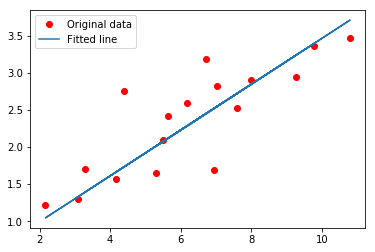

Testing... (Mean square loss Comparison)
Testing cost= 0.0798191
Absolute mean square loss difference: 0.00838158


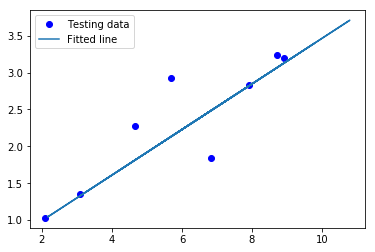

In [3]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


# Task:
1. download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets
2. build linear regression  using `sqft_living` or `sqft_lot` of house age features 
3. build these regression models using different libraries (sklearn, statsmodel, tensorflow)
4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

## Report 1

In [1]:
# YOUR CODE HERE
%pylab inline

import pandas as pd
import numpy as np

dataset = pd.read_csv("kc_house_data.csv")
print(dataset.info())

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5),

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.sqft_living, dataset.price, test_size=0.35, random_state=19)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

##### 3.Build these regression models using different libraries: 

Sklearn

Coefficients: 
 [[ 274.71142529]] [-32614.18509372]
Mean squared error: 72499337246.73
Variance score: 0.51


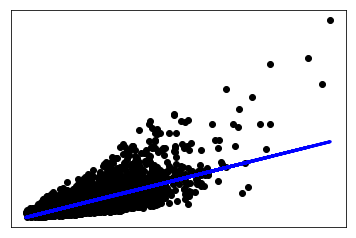

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# Create linear regression object
regr_hous_sl = linear_model.LinearRegression()

# Train the model using the training sets
regr_hous_sl.fit(X_train.reshape(X_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1))

y_pred_sl=regr_hous_sl.predict(X_test.reshape(X_test.shape[0], 1))

# The coefficients
print('Coefficients: \n', regr_hous_sl.coef_, regr_hous_sl.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_pred_sl - y_test.reshape(y_test.shape[0], 1)) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_hous_sl.score(X_test.reshape(X_test.shape[0], 1), y_test.reshape(y_test.shape[0], 1)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_sl, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Statsmodel

In [4]:
import statsmodels.api as sm

X_train_stat = sm.add_constant(X_train, prepend=False)
X_test_stat = sm.add_constant(X_test, prepend=False)
y_train_stat = y_train.copy()
y_test_stat = y_test.copy()

# Fit and summarize OLS model
mod_stat = sm.OLS(exog=X_train_stat, endog=y_train_stat)
res_stat = mod_stat.fit()

print(res_stat.summary())

y_pred_stat=res_stat.predict(X_test_stat)

print('RMSE', np.mean((y_pred_stat - y_test_stat)**2))


C:\Users\hhp\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Thu, 25 May 2017   Prob (F-statistic):               0.00
Time:                        14:46:52   Log-Likelihood:            -1.9494e+05
No. Observations:               14048   AIC:                         3.899e+05
Df Residuals:                   14046   BIC:                         3.899e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           274.7114      2.394    114.759      0.0

Tensorflow

Epoch: 0010 cost= 33999054848.000000000 W= 243.526 b= -5.15082
Epoch: 0020 cost= 33998999552.000000000 W= 243.529 b= -11.047
Epoch: 0030 cost= 33998929920.000000000 W= 243.531 b= -16.9421
Epoch: 0040 cost= 33998880768.000000000 W= 243.534 b= -22.8363
Epoch: 0050 cost= 33998829568.000000000 W= 243.537 b= -28.7294
Optimization Finished!
Training cost= 3.39988e+10 W= 243.537 b= -28.7294 



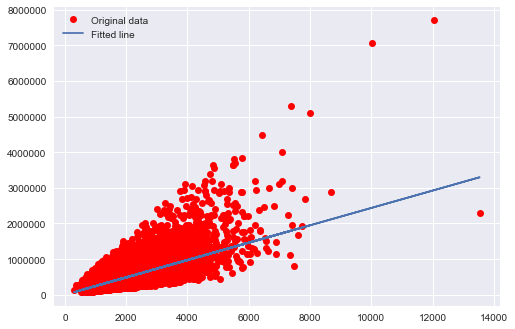

Testing... (Mean square loss Comparison)
Testing cost= 3.77726e+10
Absolute mean square loss difference: 3.77378e+09


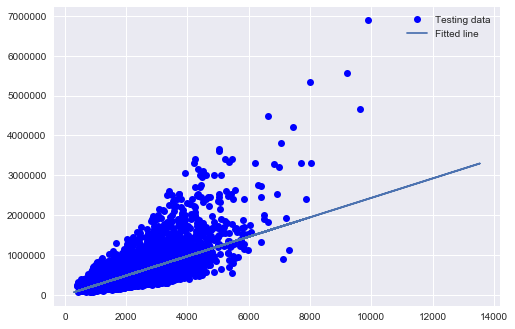

In [32]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.0001
training_epochs = 50
display_step = 10

# Training Data
n_samples = X_train.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # Graphic display
    plt.plot(X_train, y_train, 'ro', label='Original data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * X_test.shape[0]),
        feed_dict={X: X_test, Y: y_test})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", \
          abs(training_cost - testing_cost))
    
    y_pred_tf = sess.run(W) * X_test + sess.run(b)
    
    plt.plot(X_test, y_test, 'bo', label='Testing data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

##### 4. compare models using $R^2$, $R^2_{adj}$ and RMSE  

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

results = pd.DataFrame({})
results = results.reindex(index=['$R^2$', '$R^2_{adj}$', 'RMSE'])


sklearn_res=[]
R_2=r2_score(y_test, y_pred_sl) 
R_2_adj=1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE = mean_squared_error(y_test, y_pred_sl)**0.5
sklearn_res=[R_2, R_2_adj, RMSE]

statsmodel_res=[]
R_2=r2_score(y_test, y_pred_stat) 
R_2_adj=1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE=mean_squared_error(y_test, y_pred_stat)**0.5 
statsmodel_res=[R_2, R_2_adj, RMSE]

tensorflow_res=[]
R_2=r2_score(y_test, y_pred_tf) 
R_2_adj= 1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE= mean_squared_error(y_test, y_pred_tf)**0.5
tensorflow_res=[R_2, R_2_adj, RMSE]

             
results.insert(loc=len(results.columns), column='Sklearn', value=sklearn_res)
results.insert(loc=len(results.columns), column='Statsmodel', value=statsmodel_res)
results.insert(loc=len(results.columns), column='Tensorflow', value=tensorflow_res)

results


,Sklearn,Statsmodel,Tensorflow
$R^2$,0.506654,0.506654,0.485928
$R^2_{adj}$,0.506589,0.506589,0.485860
RMSE,269257.009652,269257.009652,274854.895506


# Categorical variables

Task:
1. Answer the questions:
    - What is a categorical variables?
    - Which features from the house sales dataset are categorical?
    - How can you make model using these features?

## Report 2
Answers:

- a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property (https://en.wikipedia.org/wiki/Categorical_variable);
- waterfront, view;
- we can convert them into ordinal features.


## Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.


![reg_picture](https://qph.ec.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02)


Task:
1. Build crosscorrelation table for features
2. Fit linear regression model using at least 2 highly correlated features
3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models. [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

## Report 3

###### 1.Build crosscorrelation table for features

In [6]:
# YOUR CODE HERE
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 24 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

C:\Users\hhp\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


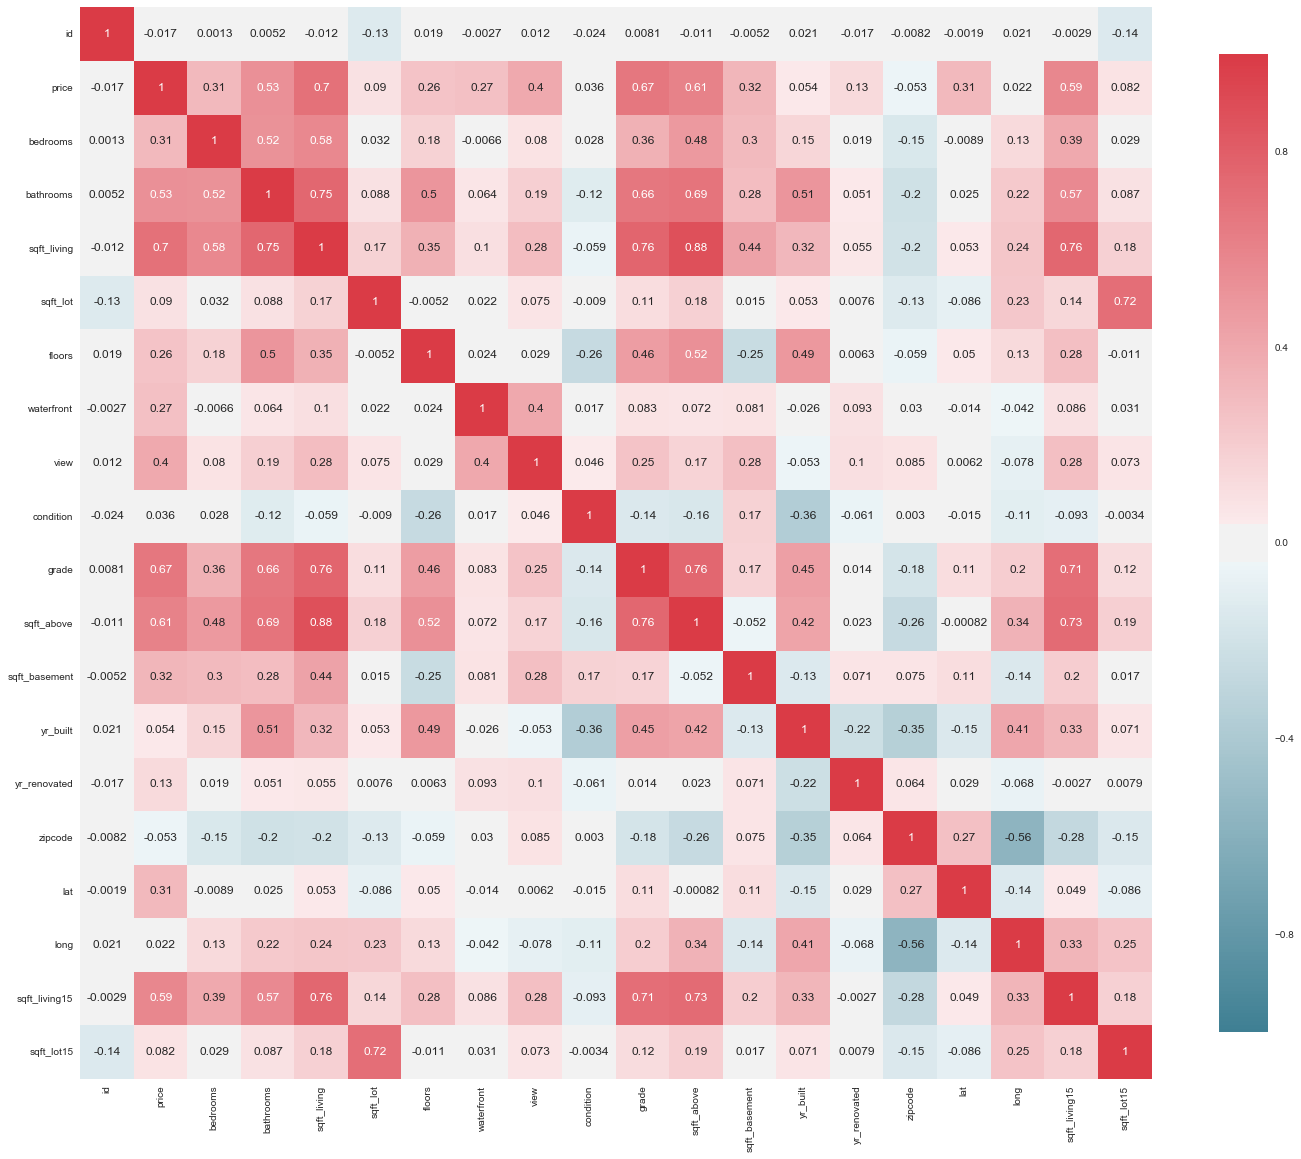

In [7]:
plot_correlation_map( dataset )

Highly correlated features are "sqft_living" and "sqft_above"

###### 2. Fit linear regression model using at least 2 highly correlated features

In [8]:
# Use only two feature
two_feat_data = dataset.loc[:, ['sqft_living', 'sqft_above']]
X = two_feat_data
y = dataset.price

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.35, random_state=13)
X_train_2, X_test_2, y_train_2, y_test_2 = np.array(X_train_2), np.array(X_test_2), np.array(y_train_2), np.array(y_test_2)

In [10]:
# Create linear regression object
regr_two_feat = linear_model.LinearRegression()

# Train the model using the training sets
regr_two_feat.fit(X_train_2.reshape(X_train_2.shape[0], 2), y_train_2.reshape(y_train_2.shape[0], 1))

y_pred_sl_2=regr_two_feat.predict(X_test_2.reshape(X_test_2.shape[0], 2))

# The coefficients
print('Coefficients: \n', regr_two_feat.coef_, regr_two_feat.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_pred_sl_2 - y_test_2.reshape(y_test_2.shape[0], 1)) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_two_feat.score(X_test_2.reshape(X_test_2.shape[0], 2), \
                                                   y_test_2.reshape(y_test_2.shape[0], 1)))

Coefficients: 
 [[ 279.63549727   -7.40724014]] [-29907.75098604]
Mean squared error: 73748230349.83
Variance score: 0.49


###### Plot values of regrssion coefficients as a function of regularization parameter   $\alpha$  for LASSO and RIDGE models

In [11]:
# Center the data
import sklearn.preprocessing as prep
X = prep.scale(two_feat_data)
y = prep.scale(dataset.price)

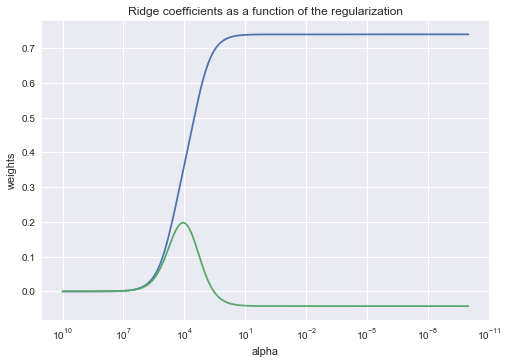

In [12]:
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

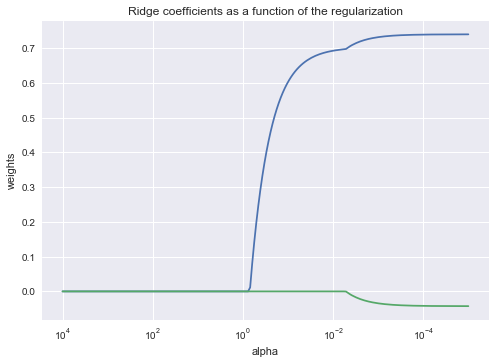

In [13]:
n_alphas = 200
alphas = np.logspace(-5, 4, n_alphas)
clf_l = linear_model.Lasso(fit_intercept=False)

coefs = []
for a in alphas:
    clf_l.set_params(alpha=a)
    clf_l.fit(X, y)
    coefs.append(clf_l.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Regression trees 

Task:
1. try `sklearn.tree.DecisionTreeRegressor`
2. compare models using $R^2$, $R^2_{adj}$ and RMSE 


## Report 4

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.sqft_living, dataset.price, test_size=0.35, random_state=19)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

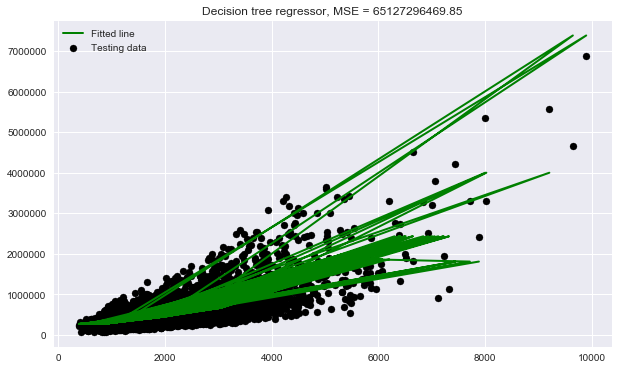

In [17]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train.reshape(X_train.shape[0], 1), y_train.reshape(y_train.shape[0], 1))
reg_tree_pred = reg_tree.predict(X_test.reshape(X_test.shape[0], 1))

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c="black", label="Testing data")
#plt.scatter(X_train, y_train, c="blue", label="Training data" )
plt.plot(X_test, reg_tree_pred, "g", lw=2, label='Fitted line')
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((reg_tree_pred - y_test)**2)) 
plt.legend()
plt.show()


In [34]:
results = pd.DataFrame({})
results = results.reindex(index=['$R^2$', '$R^2_{adj}$', 'RMSE'])

sklearn_res=[]
R_2=r2_score(y_test, y_pred_sl) 
R_2_adj=1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE = mean_squared_error(y_test, y_pred_sl)**0.5
sklearn_res=[R_2, R_2_adj, RMSE]

statsmodel_res=[]
R_2=r2_score(y_test, y_pred_stat) 
R_2_adj=1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE=mean_squared_error(y_test, y_pred_stat)**0.5 
statsmodel_res=[R_2, R_2_adj, RMSE]

tensorflow_res=[]
R_2=r2_score(y_test, y_pred_tf) 
R_2_adj= 1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE= mean_squared_error(y_test, y_pred_tf)**0.5
tensorflow_res=[R_2, R_2_adj, RMSE]

reg_trees=[]
R_2=r2_score(y_test, reg_tree_pred) 
R_2_adj=1.0-(1.0-R_2)*(y_test.shape[0])/(y_test.shape[0]-1.0)
RMSE = mean_squared_error(y_test, reg_tree_pred)**0.5
reg_trees=[R_2, R_2_adj, RMSE]
          
results.insert(loc=len(results.columns), column='Sklearn', value=sklearn_res)
results.insert(loc=len(results.columns), column='Statsmodel', value=statsmodel_res)
results.insert(loc=len(results.columns), column='Tensorflow', value=tensorflow_res)
results.insert(loc=len(results.columns), column='Regression trees', value=reg_trees)

results


,Sklearn,Statsmodel,Tensorflow,Regression trees
$R^2$,0.506654,0.506654,0.485928,0.556820
$R^2_{adj}$,0.506589,0.506589,0.485860,0.556761
RMSE,269257.009652,269257.009652,274854.895506,255200.502487


# XGBoost regressor 
I have mentioned it here only for you to know about the existence of that model